In [ ]:
!pip install libsvmdata

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from libsvmdata import fetch_libsvm
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Prepare diabete dataset

In [ ]:
# Get preprocessed dataset
X, y = fetch_libsvm("diabetes_scale")
y = y.reshape(-1, 1)

In [4]:
# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [5]:
print(f"-----Train size-----\n features: {X_train.shape}, label: {y_train.shape}")
print(f"-----Test size-----\n features: {X_test.shape}, label: {y_test.shape}")

-----Train size-----
 features: (614, 8), label: (614, 1)
-----Test size-----
 features: (154, 8), label: (154, 1)


### Perceptron algorithm

In [6]:
def plot_loss_and_accuracy(epochs, learning_rate, loss, acc):
  plt.figure(figsize=(14, 6))
  plt.subplot(1, 2, 1)
  plt.plot(range(1, epochs+1), loss, label = f'learning rate = {learning_rate}')
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.legend()

  plt.subplot(1, 2, 2)
  plt.plot(range(1, epochs+1), acc, label = f'learning rate = {learning_rate}')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend()


def plot_losses_and_accuracies(epochs, learning_rates, losses, accuracies):
  plt.figure(figsize=(14, 6))
  plt.subplot(1, 2, 1)
  for i in range(len(learning_rates)):
    plt.plot(range(1, epochs+1), losses[i], label = f'learning rate = {learning_rates[i]}')

  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.legend()

  plt.subplot(1, 2, 2)
  for i in range(len(learning_rates)):
    plt.plot(range(1, epochs+1), accuracies[i], label = f'learning rate = {learning_rates[i]}')

  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend()

#### Perceptron

In [26]:
def perceptron_loss(y_true, y_predict):
  return max(0, -y_true * y_predict)


def accuracy(y_true, y_predict):
  return round(np.count_nonzero(y_true == y_predict) / len(y_true), 2)


def perceptron_train_step(X, y, weight, lr=0.001):
  loss = 0
  for j in range(len(X)):
    y_pred = np.dot(weight.T, X[j])
    
    # Update weight
    # np.dot: matrix multiplication, * / multiply : element-wise
    if y[j] * y_pred <= 0:
      weight += lr * (y[j] * X[j]).reshape(-1, 1)
  
  return weight


def perceptron_algorithm(X, y, epochs=20, lr=0.001, print_status=True, sign=False):
  loss_record = []
  acc_record = []
  # Add bias to features
  N, d = X.shape
  X = np.hstack((np.ones((N, 1)), X))
  # Init weights
  w = np.zeros((d + 1, 1))
  for i in range(epochs):
    w = perceptron_train_step(X, y, w, lr)
    # Perceptron loss
    if sign:
      y_hat = np.sign(np.dot(X, w))
    else:
      y_hat = np.dot(X, w)
  
    loss = list(map(perceptron_loss, y, y_hat))
    loss = sum(loss) / N
    loss_record.append(loss)

    y_pred = np.sign(np.dot(X, w))
    acc = accuracy(y, y_pred)
    acc_record.append(acc)

    if print_status:
      print(f"Epoch {i + 1}: train loss: {round(loss[0], 5)}, train acc: {acc}")
  
  return w, loss_record, acc_record


def perceptron_predict(X, y, w):
  # Add bias to features
  N = X.shape[0]
  X = np.hstack((np.ones((N, 1)), X))
  y_predict = np.sign(np.dot(X, w))
  loss = list(map(perceptron_loss, y, y_predict))
  loss = sum(loss) / N
  return y_predict, round(loss[0], 5)

In [27]:
# Test perceptron algorithm on default parameters
weight, loss, acc = perceptron_algorithm(X_train, y_train)

Epoch 1: train loss: 0.00032, train acc: 0.72
Epoch 2: train loss: 0.00064, train acc: 0.69
Epoch 3: train loss: 0.00035, train acc: 0.73
Epoch 4: train loss: 0.00072, train acc: 0.69
Epoch 5: train loss: 0.00027, train acc: 0.72
Epoch 6: train loss: 0.00028, train acc: 0.75
Epoch 7: train loss: 0.00042, train acc: 0.65
Epoch 8: train loss: 0.00026, train acc: 0.72
Epoch 9: train loss: 0.00097, train acc: 0.67
Epoch 10: train loss: 0.00056, train acc: 0.72
Epoch 11: train loss: 0.00074, train acc: 0.68
Epoch 12: train loss: 0.00055, train acc: 0.72
Epoch 13: train loss: 0.00022, train acc: 0.76
Epoch 14: train loss: 0.00055, train acc: 0.73
Epoch 15: train loss: 0.00033, train acc: 0.72
Epoch 16: train loss: 0.00064, train acc: 0.71
Epoch 17: train loss: 0.00028, train acc: 0.75
Epoch 18: train loss: 0.00032, train acc: 0.71
Epoch 19: train loss: 0.00042, train acc: 0.76
Epoch 20: train loss: 0.00035, train acc: 0.73


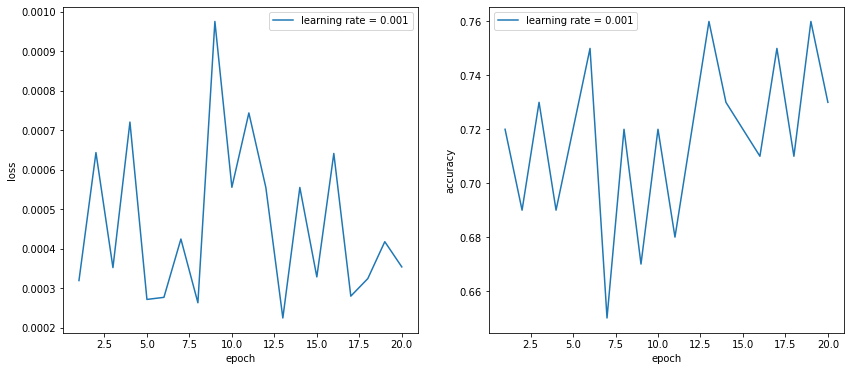

In [28]:
plot_loss_and_accuracy(20, 0.001, loss, acc)

In [29]:
y_predict, test_loss = perceptron_predict(X_test, y_test, weight)
test_acc = accuracy(y_test, y_predict)
print(f"Test loss: {test_loss}, test acc : {test_acc}")

Test loss: 0.18182, test acc : 0.82


### Experiment

Experiment on learning rate and number of epochs

#### Learning rate

In [30]:
epochs = 50
learning_rates = [0.01, 0.001, 0.0001, 1e-5]
losses = []
accuracies = []
weights = []

# sign = False means the algorithm takes the output values.
for i in range(len(learning_rates)):
  weight, loss, acc = perceptron_algorithm(X_train, y_train, epochs, learning_rates[i], print_status=False, sign=False)
  losses.append(loss)
  accuracies.append(acc)
  weights.append(weight)

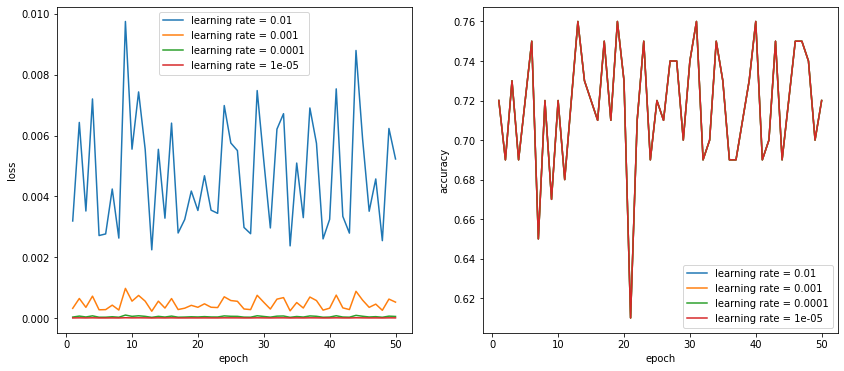

In [31]:
plot_losses_and_accuracies(epochs, learning_rates, losses, accuracies)

In [32]:
epochs = 50
learning_rates = [0.01, 0.001, 0.0001, 1e-5]
losses = []
accuracies = []
weights = []

# sign = True means the algorithm only takes the sign of the output value
for i in range(len(learning_rates)):
  weight, loss, acc = perceptron_algorithm(X_train, y_train, epochs, learning_rates[i], print_status=False, sign=True)
  losses.append(loss)
  accuracies.append(acc)
  weights.append(weight)

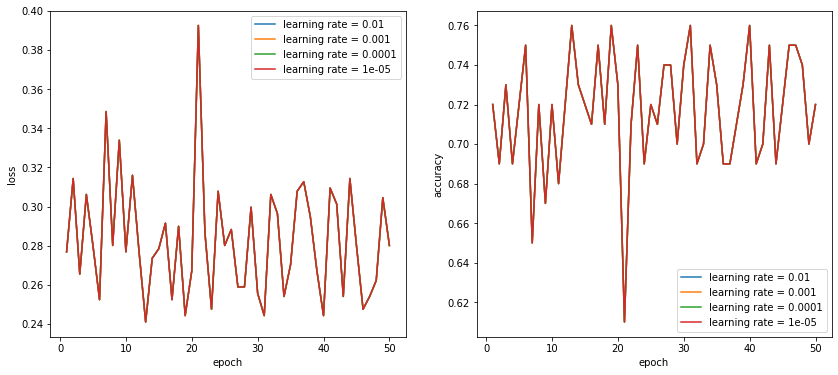

In [33]:
plot_losses_and_accuracies(epochs, learning_rates, losses, accuracies)

#### Number of epochs

In [34]:
epochs = 100

weight, loss, acc = perceptron_algorithm(X_train, y_train, epochs, 1, False)

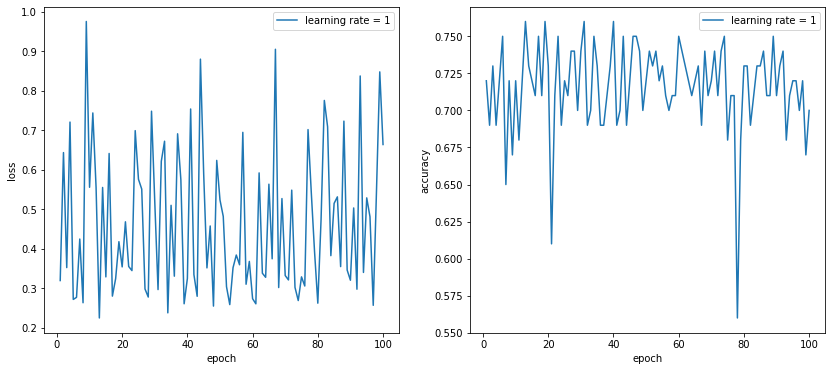

In [35]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), loss, label = 'learning rate = 1')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), acc, label = 'learning rate = 1')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

In [38]:
best_epochs = np.argmax(acc) + 1
print(f"Best epochs: {best_epochs}")

Best epochs: 13


In [39]:
weight, loss, acc = perceptron_algorithm(X_train, y_train, best_epochs, 1, False)

In [40]:
y_predict, test_loss = perceptron_predict(X_test, y_test, weight)
test_acc = accuracy(y_test, y_predict)
print(f"Test loss: {test_loss}, test acc : {test_acc}")

Test loss: 0.15584, test acc : 0.84


#### Evaluation

#### Retrain with best epochs

In [41]:
def plot_heatmap(cm, index, cmap="BuPu"):
  cmdf = pd.DataFrame(cm, index=index, columns=index)
  fig, ax = plt.subplots(figsize=(10, 8))
  sns.heatmap(cmdf, annot=True, cmap=cmap, center=0, fmt='g')
  ax.set_ylabel('Actual')
  ax.set_xlabel('Predicted')

In [42]:
classes = ["non-diabete", "diabete"]

In [43]:
epochs = best_epochs
weight, loss, acc = perceptron_algorithm(X_train, y_train, epochs, 1, False)

In [44]:
y_predict, test_loss = perceptron_predict(X_test, y_test, weight)
test_acc = accuracy(y_test, y_predict)
print(f"Test loss: {test_loss}, test acc : {test_acc}")

Test loss: 0.15584, test acc : 0.84


In [45]:
print(classification_report(y_test, y_predict, target_names=classes))

              precision    recall  f1-score   support

 non-diabete       0.73      0.79      0.76        47
     diabete       0.90      0.87      0.89       107

    accuracy                           0.84       154
   macro avg       0.81      0.83      0.82       154
weighted avg       0.85      0.84      0.85       154



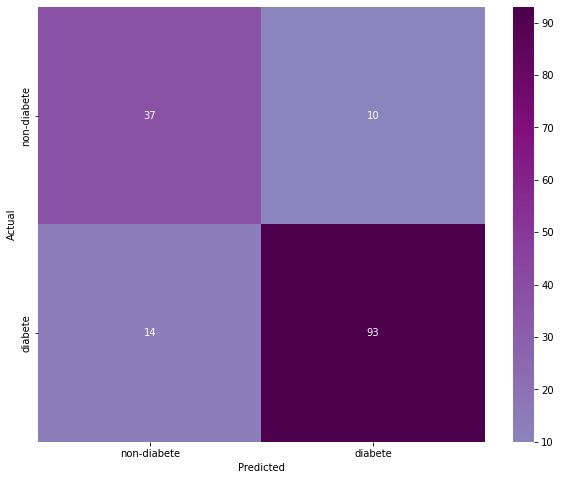

In [46]:
plot_heatmap(confusion_matrix(y_test, y_predict), classes)

#### Test on sklearn library

In [ ]:
perceptron = Perceptron(tol=1e-3, random_state=0)
perceptron.fit(X_train, y_train.ravel())
perceptron.score(X_test, y_test.ravel())

0.8051948051948052

In [ ]:
lib_pred = perceptron.predict(X_test)

In [ ]:
print(classification_report(y_test, lib_pred, target_names=classes))

              precision    recall  f1-score   support

 non-diabete       0.72      0.60      0.65        47
     diabete       0.83      0.90      0.86       107

    accuracy                           0.81       154
   macro avg       0.78      0.75      0.76       154
weighted avg       0.80      0.81      0.80       154



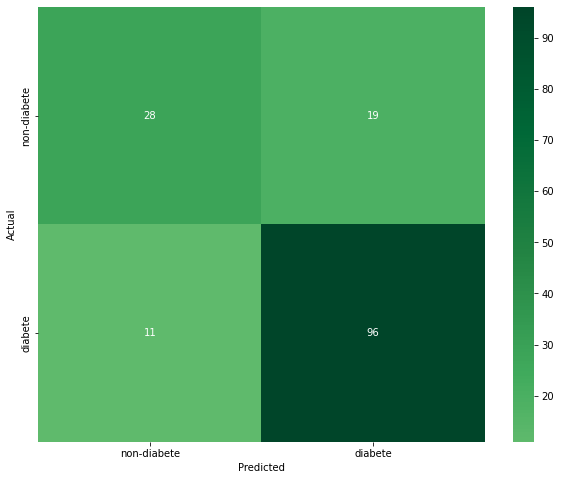

In [ ]:
plot_heatmap(confusion_matrix(y_test, lib_pred), classes, cmap="YlGn")